# First Analysis, Bangladesh Famine Data
Zeel Thakkar, Sept 15th 2020  

Guiding Question: explore the data, look for preliminary differences 

# imports

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# read in data

In [3]:
betas = pd.read_csv("~/Downloads/beta_normalised_bmiq.csv") 

In [4]:
betas

,Unnamed: 0,A001,A003,A006,A008_rep,A008,A009_rep,A009,A011,A012,...,C405,C406,C410_rep,C410,C411_rep,C411,C413_rep,C413,C414,C418
0,cg00000957,0.895048,0.880495,0.883519,0.871774,0.880974,0.848459,0.869477,0.910707,0.863935,...,0.877282,0.892543,0.877662,0.862457,0.865530,0.871169,0.874302,0.869468,0.889944,0.875260
1,cg00001349,0.712681,0.828745,0.783386,0.796415,0.829997,0.715184,0.827223,0.829003,0.821132,...,0.802155,0.797717,0.849145,0.865103,0.824336,0.840920,0.736887,0.839936,0.678318,0.756380
2,cg00001583,0.060255,0.094096,0.080852,0.079633,0.074744,0.062953,0.084129,0.077421,0.080718,...,0.062667,0.071276,0.074460,0.080397,0.046253,0.092458,0.081255,0.075852,0.074003,0.083621
3,cg00002028,0.049895,0.059334,0.025524,0.046048,0.065009,0.028436,0.055952,0.058450,0.043198,...,0.076176,0.074749,0.053452,0.125729,0.036520,0.062565,0.035335,0.144743,0.031379,0.048976
4,cg00002719,0.026454,0.041214,0.020660,0.028950,0.046747,0.021787,0.043406,0.017175,0.038114,...,0.026407,0.035225,0.037694,0.037432,0.076044,0.031759,0.022788,0.024691,0.034217,0.031175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422790,ch.22.909671F,0.058381,0.153614,0.035457,0.088401,0.109302,0.060001,0.246872,0.172702,0.153935,...,0.092456,0.159280,0.089845,0.129668,0.226458,0.110759,0.049310,0.161262,0.044129,0.141933
422791,ch.22.46830341F,0.021935,0.006510,0.023635,0.027201,0.006445,0.043293,0.012611,0.012041,0.008212,...,0.008406,0.009392,0.013599,0.008818,0.016342,0.015465,0.028291,0.007737,0.031746,0.015583
422792,ch.22.1008279F,0.017037,0.014948,0.011020,0.006164,0.013529,0.029041,0.005956,0.008250,0.007338,...,0.001512,0.009546,0.006482,0.008029,0.013847,0.005734,0.021776,0.007924,0.026880,0.000649
422793,ch.22.47579720R,0.032803,0.041379,0.048460,0.045756,0.032303,0.068397,0.024930,0.047959,0.051075,...,0.049303,0.037655,0.040119,0.041024,0.036896,0.041109,0.043154,0.036811,0.031242,0.038840


In [5]:
betas_df=pd.DataFrame(betas)
betas_df = betas_df.rename(columns={"Unnamed: 0":"ID_Column"})
betas_df

,ID_Column,A001,A003,A006,A008_rep,A008,A009_rep,A009,A011,A012,...,C405,C406,C410_rep,C410,C411_rep,C411,C413_rep,C413,C414,C418
0,cg00000957,0.895048,0.880495,0.883519,0.871774,0.880974,0.848459,0.869477,0.910707,0.863935,...,0.877282,0.892543,0.877662,0.862457,0.865530,0.871169,0.874302,0.869468,0.889944,0.875260
1,cg00001349,0.712681,0.828745,0.783386,0.796415,0.829997,0.715184,0.827223,0.829003,0.821132,...,0.802155,0.797717,0.849145,0.865103,0.824336,0.840920,0.736887,0.839936,0.678318,0.756380
2,cg00001583,0.060255,0.094096,0.080852,0.079633,0.074744,0.062953,0.084129,0.077421,0.080718,...,0.062667,0.071276,0.074460,0.080397,0.046253,0.092458,0.081255,0.075852,0.074003,0.083621
3,cg00002028,0.049895,0.059334,0.025524,0.046048,0.065009,0.028436,0.055952,0.058450,0.043198,...,0.076176,0.074749,0.053452,0.125729,0.036520,0.062565,0.035335,0.144743,0.031379,0.048976
4,cg00002719,0.026454,0.041214,0.020660,0.028950,0.046747,0.021787,0.043406,0.017175,0.038114,...,0.026407,0.035225,0.037694,0.037432,0.076044,0.031759,0.022788,0.024691,0.034217,0.031175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422790,ch.22.909671F,0.058381,0.153614,0.035457,0.088401,0.109302,0.060001,0.246872,0.172702,0.153935,...,0.092456,0.159280,0.089845,0.129668,0.226458,0.110759,0.049310,0.161262,0.044129,0.141933
422791,ch.22.46830341F,0.021935,0.006510,0.023635,0.027201,0.006445,0.043293,0.012611,0.012041,0.008212,...,0.008406,0.009392,0.013599,0.008818,0.016342,0.015465,0.028291,0.007737,0.031746,0.015583
422792,ch.22.1008279F,0.017037,0.014948,0.011020,0.006164,0.013529,0.029041,0.005956,0.008250,0.007338,...,0.001512,0.009546,0.006482,0.008029,0.013847,0.005734,0.021776,0.007924,0.026880,0.000649
422793,ch.22.47579720R,0.032803,0.041379,0.048460,0.045756,0.032303,0.068397,0.024930,0.047959,0.051075,...,0.049303,0.037655,0.040119,0.041024,0.036896,0.041109,0.043154,0.036811,0.031242,0.038840


In [6]:
list(betas)

['Unnamed: 0',
 'A001',
 'A003',
 'A006',
 'A008_rep',
 'A008',
 'A009_rep',
 'A009',
 'A011',
 'A012',
 'A013',
 'A014',
 'A020',
 'A021',
 'A031',
 'A033',
 'A034',
 'A035',
 'A043',
 'A047',
 'A049',
 'A055_rep',
 'A055',
 'A066',
 'A072',
 'A076',
 'A077',
 'A081',
 'A083',
 'A086',
 'A088',
 'A089',
 'A090',
 'A093',
 'A094',
 'A097',
 'A098',
 'A100',
 'A103',
 'A108',
 'A110',
 'A113',
 'A114',
 'A122',
 'A126',
 'A130',
 'A133',
 'A138',
 'A140',
 'B019',
 'B145',
 'B148',
 'B149',
 'B151',
 'B154',
 'B155',
 'B162',
 'B163_rep',
 'B163',
 'B164',
 'B167',
 'B168',
 'B169',
 'B170',
 'B171',
 'B172',
 'B175',
 'B179',
 'B203',
 'B204',
 'B207',
 'B211',
 'B214',
 'B215',
 'B219_rep',
 'B219',
 'B220',
 'B226_rep',
 'B226',
 'B228',
 'B232',
 'B233_rep',
 'B233',
 'B235_rep',
 'B235',
 'B237',
 'B239',
 'B246',
 'B248',
 'B257',
 'B260',
 'B262',
 'B264',
 'B267',
 'B269',
 'B271_rep',
 'B271',
 'B274',
 'B277',
 'B279',
 'C281',
 'C282',
 'C286',
 'C287',
 'C293',
 'C294',
 'C2

# visualize data

In [7]:
sample_list = list(betas)[1:]

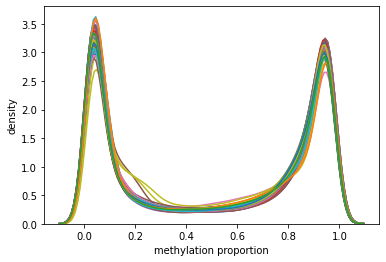

In [8]:
for sample in sample_list:
    
    sns.distplot(betas[sample], hist=False)

plt.xlabel("methylation proportion")
plt.ylabel("density")
plt.show()

# separate groups; calculate average methylation rates

In [9]:
groupA=[]
groupB=[]
groupC=[]
for sample in sample_list:
    if "rep" not in sample:
        if "A" in sample:
            groupA.append(sample)
        elif "B" in sample:
            groupB.append(sample)
        else:
            groupC.append(sample)
print(groupA)
print(groupB)
print(groupC)

['A001', 'A003', 'A006', 'A008', 'A009', 'A011', 'A012', 'A013', 'A014', 'A020', 'A021', 'A031', 'A033', 'A034', 'A035', 'A043', 'A047', 'A049', 'A055', 'A066', 'A072', 'A076', 'A077', 'A081', 'A083', 'A086', 'A088', 'A089', 'A090', 'A093', 'A094', 'A097', 'A098', 'A100', 'A103', 'A108', 'A110', 'A113', 'A114', 'A122', 'A126', 'A130', 'A133', 'A138', 'A140']
['B019', 'B145', 'B148', 'B149', 'B151', 'B154', 'B155', 'B162', 'B163', 'B164', 'B167', 'B168', 'B169', 'B170', 'B171', 'B172', 'B175', 'B179', 'B203', 'B204', 'B207', 'B211', 'B214', 'B215', 'B219', 'B220', 'B226', 'B228', 'B232', 'B233', 'B235', 'B237', 'B239', 'B246', 'B248', 'B257', 'B260', 'B262', 'B264', 'B267', 'B269', 'B271', 'B274', 'B277', 'B279']
['C281', 'C282', 'C286', 'C287', 'C293', 'C294', 'C295', 'C299', 'C301', 'C309', 'C314', 'C317', 'C337', 'C344', 'C346', 'C354', 'C360', 'C361', 'C362', 'C368', 'C369', 'C370', 'C373', 'C375', 'C376', 'C378', 'C380', 'C382', 'C387', 'C388', 'C389', 'C390', 'C391', 'C393', 'C394

In [10]:
betas_A=betas[groupA]
betas_B=betas[groupB]
betas_C=betas[groupC]

In [11]:
averagesA = []
averagesB = []
averagesC = []

for sample in groupA:
    averagesA.append(betas[sample].mean())
for sample in groupB:
    averagesB.append(betas[sample].mean())
for sample in groupC:
    averagesC.append(betas[sample].mean())

In [12]:
print(averagesA)

[0.4953744110438583, 0.521371644896769, 0.502196352213847, 0.5194458042340233, 0.5163583337390166, 0.518255491759552, 0.5102109440180069, 0.5231721409211214, 0.5200561513096369, 0.5049208375769987, 0.5120625759072595, 0.5091011421669115, 0.5221842255421472, 0.5098514474730038, 0.508748923587157, 0.5194821598942532, 0.5202372530776447, 0.5104606364996382, 0.5155409432510863, 0.5173321184128343, 0.5112205536852739, 0.5237798521756983, 0.5202089419623702, 0.5175125828416735, 0.5188649794187833, 0.5154367596152348, 0.5160475499956446, 0.5215790497423622, 0.4884251472029044, 0.5174796130437701, 0.5160615625886034, 0.5183912926628981, 0.5172404344034964, 0.48557671417230414, 0.5141871683863278, 0.5209389810253038, 0.5161375419126327, 0.5113998308477017, 0.5067223755712671, 0.5144226566520923, 0.5074635749185303, 0.5181266142629106, 0.5167039805727504, 0.5083322869648835, 0.5159130981826712]


In [13]:
averagesA_df = pd.DataFrame(averagesA)

averagesA_df["group"] = "postnatal exposure"
averagesA_df.head()

,0,group
0,0.495374,postnatal exposure
1,0.521372,postnatal exposure
2,0.502196,postnatal exposure
3,0.519446,postnatal exposure
4,0.516358,postnatal exposure


In [14]:
averagesB_df = pd.DataFrame(averagesB)

averagesB_df["group"] = "in utero exposure"
averagesB_df.head()

,0,group
0,0.507418,in utero exposure
1,0.509611,in utero exposure
2,0.516905,in utero exposure
3,0.516010,in utero exposure
4,0.519724,in utero exposure


In [15]:
averagesC_df = pd.DataFrame(averagesC)

averagesC_df["group"] = "unexposed"
averagesC_df.head()

,0,group
0,0.520825,unexposed
1,0.522995,unexposed
2,0.521232,unexposed
3,0.509170,unexposed
4,0.514248,unexposed


In [16]:
all_samples_df = pd.concat([averagesA_df, averagesB_df, averagesC_df])
all_samples_df.columns = ["averages", "group"]

# plot averages

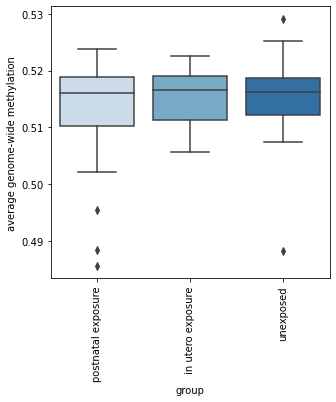

In [17]:
plt.figure(figsize=(5, 5))
sns.boxplot("group", "averages", data=all_samples_df, palette=sns.color_palette("Blues", 3))
plt.xticks(rotation=90)
plt.ylabel("average genome-wide methylation")
plt.show()

In [18]:
ilum = pd.read_csv("~/Desktop/data_a/IluminaManifestShort.csv")

/Users/zeel/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [19]:
ilum_df = pd.DataFrame(ilum)
ilum_df = ilum_df.rename(columns={"IlmnID":"ID_Column"})
ilum_df

,ID_Column,Name,AddressA_ID,AlleleA_ProbeSeq,Forward_Sequence,SourceSeq,Chromosome_36
0,cg00035864,cg00035864,31729416,AAAACACTAACAATCTTATCCACATAAACCCTTAAATTTATCTCAA...,AATCCAAAGATGATGGAGGAGTGCCCGCTCATGATGTGAAGTACCT...,AGACACTAGCAGTCTTGTCCACATAGACCCTTGAATTTATCTCAAA...,Y
1,cg00050873,cg00050873,32735311,ACAAAAAAACAACACACAACTATAATAATTTTTAAAATAAATAAAC...,TATCTCTGTCTGGCGAGGAGGCAACGCACAACTGTGGTGGTTTTTG...,CGGGGTCCACCCACTCCAAAAACCACCACAGTTGTGCGTTGCCTCC...,Y
2,cg00061679,cg00061679,28780415,AAAACATTAAAAAACTAATTCACTACTATTTAATTACTTTATTTTC...,TCAACAAATGAGAGACATTGAAGAACTAATTCACTACTATTTGGTT...,CGATGGAAAATAAAGTAACCAAATAGTAGTGAATTAGTTCTTCAAT...,Y
3,cg00063477,cg00063477,16712347,TATTCTTCCACACAAAATACTAAACRTATATTTACAAAAATACTTC...,CTCCTGTACTTGTTCATTAAATAATGATTCCTTGGATATACCAAGT...,CGATGGAAGCATTTTTGTAAATATACGTTCAGTATTTTGTGTGGAA...,Y
4,cg00121626,cg00121626,19779393,AAAACTAATAAAAATAACTTACAAACCAAATACTATACCCTACAAC...,AGGTGAATGAAGAGACTAATGGGAGTGGCTTGCAAGCCAGGTACTG...,AGACTAATGGGAGTGGCTTGCAAGCCAGGTACTGTGCCCTACAACT...,Y
...,...,...,...,...,...,...,...
486423,65622344,NORM_T,Purple,Norm_T59,NaN,NaN,NaN
486424,57640346,NORM_C,Green,Norm_C60,NaN,NaN,NaN
486425,47715450,NORM_T,Purple,Norm_T60,NaN,NaN,NaN
486426,28673402,NORM_C,Green,Norm_C61,NaN,NaN,NaN


In [20]:
combined_df=pd.merge(betas_df,ilum_df,on="ID_Column")
combined_df

,ID_Column,A001,A003,A006,A008_rep,A008,A009_rep,A009,A011,A012,...,C413_rep,C413,C414,C418,Name,AddressA_ID,AlleleA_ProbeSeq,Forward_Sequence,SourceSeq,Chromosome_36
0,cg00000957,0.895048,0.880495,0.883519,0.871774,0.880974,0.848459,0.869477,0.910707,0.863935,...,0.874302,0.869468,0.889944,0.875260,cg00000957,65648367,ATACTACTAACCCATACCCAACAAAACAAAAAACCCCAAAACATCA...,TCCTGCAGGCGCACAGACCTCATCCGCTCCAGCTTACGCCTGCGGG...,ATGCTACTGACCCATGCCCGGCAGGGCAAGGGGCCCCAGGACGTCA...,1
1,cg00001349,0.712681,0.828745,0.783386,0.796415,0.829997,0.715184,0.827223,0.829003,0.821132,...,0.736887,0.839936,0.678318,0.756380,cg00001349,11722421,CAAAACAACACAAACCAAAATCTTCCAATCTCAAACTATTTATTCC...,CCACCTCACCCGCAAGGCGGCACGAGCCGGAATCTTCCAGTCTCAG...,CAAGGCGGCACGAGCCGGAATCTTCCAGTCTCAGGCTGTTTGTTCC...,1
2,cg00001583,0.060255,0.094096,0.080852,0.079633,0.074744,0.062953,0.084129,0.077421,0.080718,...,0.081255,0.075852,0.074003,0.083621,cg00001583,55630379,ACAAAAAATAAAACCTAAACAAAAACCTAATACACCCACAAATTTC...,CGCCGTTGGGTAGCAGGAGGTAGAGCCTAGGCGAGAGCCTGGTGCG...,CGGCGAAACCCGTGGGCGCACCAGGCTCTCGCCTAGGCTCTACCTC...,1
3,cg00002028,0.049895,0.059334,0.025524,0.046048,0.065009,0.028436,0.055952,0.058450,0.043198,...,0.035335,0.144743,0.031379,0.048976,cg00002028,56738397,CCCAAATTTATTATAACCAACAAAAAACACCAATAATAACAACAAC...,CAGAGGCACCGCCCCAAGTTTGTTGTGACCGGCGGGGGACGCCGGT...,CGCCGCTGCCGCCACCACCGGCGTCCCCCGCCGGTCACAACAAACT...,1
4,cg00002719,0.026454,0.041214,0.020660,0.028950,0.046747,0.021787,0.043406,0.017175,0.038114,...,0.022788,0.024691,0.034217,0.031175,cg00002719,52741444,CAATAATCTAAAAATATTACATACACCTACACAAATTTTTATCACT...,GGACCACACTGCCATGGCAACAGCGTGCCTCTGCGTCCTCCATCCG...,CGAGAGCGACAAAAATCTGCGCAGGCGCATGCAATATCCTCAGACC...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422790,ch.22.909671F,0.058381,0.153614,0.035457,0.088401,0.109302,0.060001,0.246872,0.172702,0.153935,...,0.049310,0.161262,0.044129,0.141933,ch.22.909671F,47797398,GCACCACTTACACACAAAAACATTTCTTTTCAATAAATTTTTAATT...,TTTTCCTTTTAGCTGCTGATAGATTAATAGTATGTGAACCTTTTAA...,CAGCAAATCAAAAATTCACTGAAAAGAAATGCTTTTGTGTGTAAGT...,22
422791,ch.22.46830341F,0.021935,0.006510,0.023635,0.027201,0.006445,0.043293,0.012611,0.012041,0.008212,...,0.028291,0.007737,0.031746,0.015583,ch.22.46830341F,29618504,GAAAAAATAAAAACCATTCTCTAAACAAAATACCTTCTACATATAA...,TGTGCATACATGCGCATGTGAACAGTCCATGGAGCTTAATCCCCTG...,CAGCATCACATGTAGAAGGCATTCTGCTCAGAGAATGGCCTCCATT...,22
422792,ch.22.1008279F,0.017037,0.014948,0.011020,0.006164,0.013529,0.029041,0.005956,0.008250,0.007338,...,0.021776,0.007924,0.026880,0.000649,ch.22.1008279F,49664383,CCCCTACAATCTTCCTAAACCTAAAACTAAATCTATATTAAATAAA...,CTGGCAGGGCACACACCTCAGCTGGGCCCTGTGGCAGGTGAACCCC...,CAAGACTCATTCAACACAGACCCAGCCTCAGGCCCAGGAAGACTGT...,22
422793,ch.22.47579720R,0.032803,0.041379,0.048460,0.045756,0.032303,0.068397,0.024930,0.047959,0.051075,...,0.043154,0.036811,0.031242,0.038840,ch.22.47579720R,53733426,CCTCTCTCCAACTTCTAAAATTTACTAATAATCTCTAAAACCCCTT...,ATGTACCCATACGGGAAAGGCCGCGTGAAGATGGAGACAGAGATGG...,CAGGCAAGGGGCCTCAGAGATCACCAGCAAACCCCAGAAGCTGGAG...,22
